In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

from langevin.simulation import run_langevin_simulation
from langevin.analysis import compute_overlap_function, compute_overlap_function, compute_chi4_overlap

In [5]:
#simulations parameters
dt = 1e-3
n_particles = 10
t_max = 10.
n_steps = int(t_max/dt)
m=1.0
gamma_l = 1.
kB=1.
T = 0.11
gamma_g = VFT_gamma(T)
tau = 1

In [6]:
# run simulation
positions, velocities, gamma_values = run_langevin_simulation(
    T=T,tau=tau,n_steps=n_steps,n_particles=n_particles,dt=dt,gamma_l=gamma_l, gamma_g=gamma_g,m=m,kB=kB)



In [7]:
a_ = np.logspace(-4,-1,6)
print(a_)
t_, Q_ = [],[]
for i in range(len(a_)):
    time_lags, Q_t = compute_overlap_function(positions, a=a_[i], dt = dt)
    # Store results
    Q_.append(Q_t)
    t_.append(time_lags)

[0.0001     0.00039811 0.00158489 0.00630957 0.02511886 0.1       ]


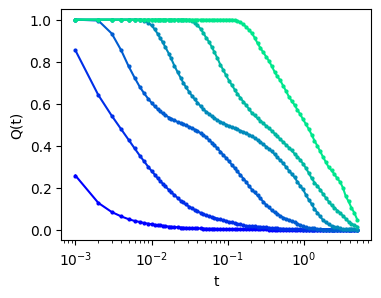

In [8]:
plt.figure(figsize=[4,3])
colors = plt.cm.winter(np.linspace(0, 0.9, len(a_)))

for i in range(len(a_)):
    plt.plot(t_[i], Q_[i], '-o', label=r'a=%.2f'%a_[i], color=colors[i], ms=2)
plt.xscale('log')
#plt.legend()
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.show()

In [10]:
t_, Q_ = [],[]
chi4_ = []
a_ = 1e-3
T_ = np.linspace(0.105, 0.116, 16)
for i, T in enumerate(T_):
    start_ = time.time()
    
    gamma_g = VFT_gamma(T)

    # Run simulation
    positions, gamma_values, velocities = run_langevin_simulation(
        T=T,tau=tau, n_steps=n_steps,n_particles=n_particles,dt=dt,
        gamma_l=gamma_l,gamma_g=gamma_g,m=m,
        kB=kB,seed=2)
    
    # compute SISF
    t, Q = compute_overlap_function(positions, a=a_, dt = dt)
    t, chi4 = compute_chi4_overlap(positions, a=a_, dt = dt)
    
    # Store results
    Q_.append(Q)
    t_.append(t)
    chi4_.append(chi4)

    end_ = time.time()
    print(f"T = {T:.3f} | {end_ - start_:.2f} seconds")

T = 0.105 | 0.42 seconds
T = 0.106 | 0.38 seconds
T = 0.106 | 0.38 seconds
T = 0.107 | 0.38 seconds
T = 0.108 | 0.39 seconds
T = 0.109 | 0.38 seconds
T = 0.109 | 0.40 seconds
T = 0.110 | 0.38 seconds
T = 0.111 | 0.39 seconds
T = 0.112 | 0.39 seconds
T = 0.112 | 0.39 seconds
T = 0.113 | 0.39 seconds
T = 0.114 | 0.39 seconds
T = 0.115 | 0.39 seconds
T = 0.115 | 0.39 seconds
T = 0.116 | 0.39 seconds


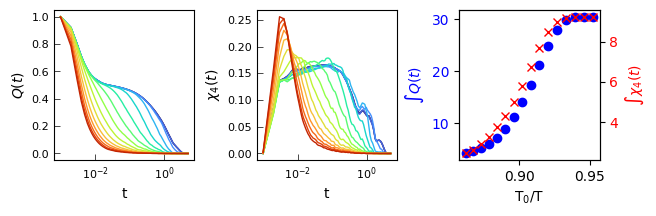

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(6.5, 2.1))
colors = plt.cm.turbo(np.linspace(0, 0.9, len(T_)))

for i in range(len(T_)):             
    axs[0].plot(t_[i], np.array(Q_[i]), '-', ms=2,c=colors[i], alpha=1, lw=1)
    axs[1].plot(t_[i], np.array(chi4_[i]), '-', ms=2,c=colors[i], alpha=1, lw=1)
    
axs[0].set_xlabel("t", fontsize=10)
axs[0].set_ylabel(r'$Q(t)$', fontsize=10)
axs[0].set_xscale('log')
#axs[0].legend(frameon=False, fontsize=6)
axs[0].tick_params(axis='both', which='major', labelsize=8, direction='in', length=4, width=0.5)
axs[0].tick_params(axis='both', which='minor', labelsize=8, direction='in', length=2, width=0.5)

axs[1].set_xlabel("t", fontsize=10)
axs[1].set_ylabel(r'$\chi_4(t)$', fontsize=10)
axs[1].set_xscale('log')
axs[1].set_xscale('log')

#axs[0].legend(frameon=False, fontsize=6)
axs[1].tick_params(axis='both', which='major', labelsize=8, direction='in', length=4, width=0.5)
axs[1].tick_params(axis='both', which='minor', labelsize=8, direction='in', length=2, width=0.5)


# Second subplot (dual y-axis)
ax1 = axs[2]
ax2 = ax1.twinx() # Create a twin Axes sharing the x-axis


# #plt.subplot(1,2,2)
# ax1.plot(T_0/T_,tau_alpha,'-o',c='blue')
# ax1.set_xlabel(r"T$_0$/T", fontsize=10)
# ax1.set_ylabel(r'$\tau_a$', fontsize=10)
# ax1.set_yscale('log')
# #ax2.plot(T_0/T_,kww,'-o',c='red')
# #ax2.set_ylim(0.9,2)

q_integr = np.zeros(len(T_))
chi_integr = np.zeros(len(T_))
for i in range(len(T_)):    
    q_integr[i] = np.trapz(Q_[i])
    chi_integr[i] = np.trapz(chi4_[i])
ax1.plot(T_0/T_, q_integr, 'o', c='blue')
ax2.plot(T_0/T_, chi_integr, 'x', c='red')
ax1.set_xlabel(r"T$_0$/T", fontsize=10)
ax1.set_ylabel(r"$\int Q(t)$", fontsize=10, color='blue')
ax2.set_ylabel(r"$\int \chi_4(t)$", fontsize=10, color='red')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')


#ax1.set_xlabel("t", fontsize=10)
plt.tight_layout(pad=0.5)
#plt.savefig('figs/Fig_chi4.pdf', dpi=300)
plt.show()